In [1]:
# !mkdir data
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem2/zhestov.ea%40phystech.edu.csv -O ./data/zhestov.ea@phystech.edu.csv

--2021-03-01 14:35:26--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem2/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2518 (2.5K) [text/plain]
Saving to: ‘./data/zhestov.ea@phystech.edu.csv’

./data/zhestov.ea@p 100%[===================>]   2.46K  --.-KB/s    in 0s      

2021-03-01 14:35:27 (46.5 MB/s) - ‘./data/zhestov.ea@phystech.edu.csv’ saved [2518/2518]



In [8]:
import pandas as pd
import numpy as np
from scipy import stats as st


series = pd.read_csv('data/zhestov.ea@phystech.edu.csv', header=None)
series = series[0]

In [9]:
series.head()

0    0.727367
1    1.797530
2    1.187316
3    0.557649
4    2.685771
Name: 0, dtype: float64

In [10]:
def round2(num: float) -> float:
    return round(num, 2)

In [11]:
round2(series.mean())

0.9

In [12]:
round2(series.std(ddof=0))

0.94

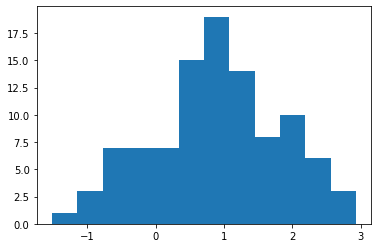

In [13]:
from matplotlib import pyplot as plt

plt.hist(series.values, bins=12)
plt.show()

In [14]:
st.jarque_bera(series)

(1.3050852303275453, 0.5207201013082896)

In [15]:
st.shapiro(series)

(0.9884920716285706, 0.5451670289039612)

In [16]:
binarized_series = (series >= 0).astype(int)
ones_count = binarized_series.sum()
ones_count

82

In [17]:
round2(st.binom_test((ones_count, len(series)), p=0.5, alternative='two-sided'))

0.21

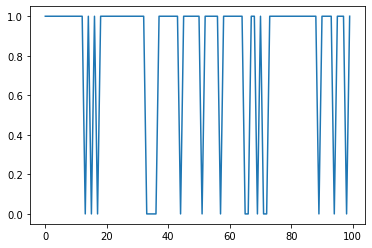

In [18]:
plt.plot(binarized_series)

In [19]:
L_0 = st.bernoulli.pmf(k=binarized_series, p=0.5)
L_MLE = st.bernoulli.pmf(k=binarized_series, p=(sum(binarized_series) / len(binarized_series)))
LR = 2 * np.log(np.prod(L_MLE / L_0))
round2(LR)

44.35